In [1]:
import gym
import numpy as np
import gym_toytext
import tensorflow as tf
import rl.agents
import matplotlib.pyplot as plt

In [2]:
env= gym.make('Taxi-v3')

In [3]:
print(env.observation_space)
print(env.action_space)

Discrete(500)
Discrete(6)


In [4]:
env.reset()

293

In [6]:
for ep in range(1):
    state= env.reset()
    done= False
    Tr=0
    t=0
    while not done:
        env.render()
        state_, reward, done, info= env.step(np.random.randint(6))
        
        Tr+= reward
        print(t+1,state_, reward, done)
        t+=1
#     print(ep+1,":", Tr)

env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

1 489 -1 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
2 489 -1 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
3 489 -10 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
4 489 -1 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
5 469 -1 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
6 469 -10 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
7 369 -1 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
8 369 -10 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
9 369 -1 False
+---------+
|R: | : :G

In [15]:
Q= np.zeros((500,6))
e= 0.1
gamma= 0.9
alpha=0.2
EP=10000
Tr_list=[]

for ep in range(EP):
    state= env.reset()
        
    P=[e/6]*6
    P[np.argmax(Q[state])]+=(1-e)
    action= np.random.choice([0,1,2,3,4,5],p=P)
    done= False
    TR=0
    
    while not done:
        next_state, reward, done, info= env.step(action)

        best_action= np.argmax(Q[next_state])
        
        P=[e/6]*6
        greedy_action= np.argmax(Q[next_state])
        P[greedy_action]+= (1-e)
        
        E=0
        for a in range(6):
            E+= Q[next_state][a]*P[a]
        
        Q[state][action]= Q[state][action]+ (alpha*(reward + (0.99*E)- Q[state][action] ))
        
        
        next_action= np.random.choice([0,1,2,3,4,5],p=P)
        

        state= next_state
        action= next_action
        
        TR+=reward
    
    Tr_list.append(TR)
    
#     e= 0.05 + ((0.9-0.05)*np.exp(-0.01*ep) )
    print(ep, end='\r')

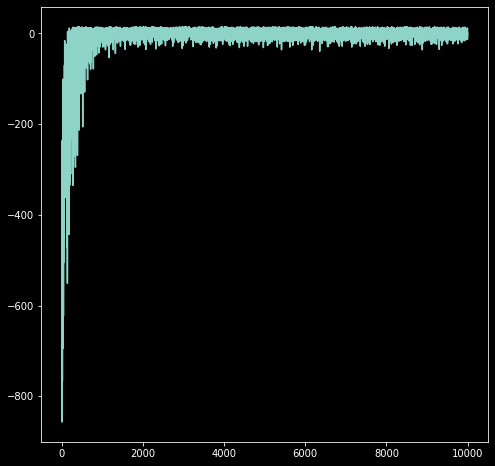

In [16]:
plt.figure(0, figsize=(8,8))
plt.style.use('dark_background')
plt.xticks(color='white')
plt.yticks(color='white')
plt.plot(Tr_list)

## Now we use these Q Values to reach the goal. Let's see our success rate.

In [17]:
success=np.zeros(500)
total_run=50

for runs in range(100):
    temp=np.zeros(500)

    for episodes in range(total_run):

        state= env.reset()
        action= np.argmax(Q[state])
        done= False
        Tr=0
        while not done:

            next_state, reward, done, info= env.step(action)

            action= np.argmax(Q[next_state])

            state= next_state

            Tr+=reward
            
        temp[episodes]=Tr
        
    success+=temp

In [19]:
Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.64749807,  3.109242  ,  1.32205729,  2.61211304,  5.41532809,
        -5.77533569],
       [ 7.4283844 ,  9.93056255,  6.76371356,  9.4057644 , 11.82078887,
         0.31774825],
       ...,
       [ 2.40546494, 12.54414282, -1.36821255, -1.44940586, -2.69830708,
        -2.76182608],
       [-3.63641883,  3.74798413, -3.94812759, -3.82595912, -4.95563135,
        -7.01921357],
       [-0.36066   ,  2.28775461,  8.95333575, 18.45346698,  1.35006486,
         1.17874332]])

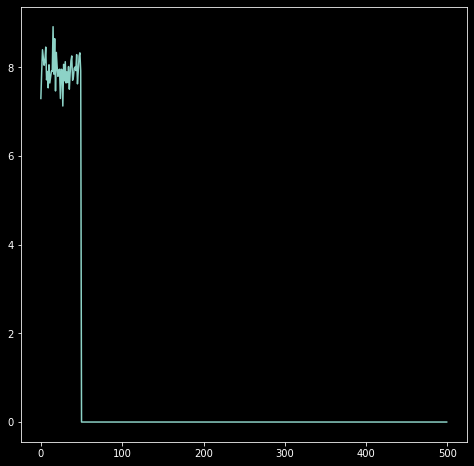

In [20]:
plt.figure(0,figsize=(8,8))
plt.style.use('dark_background')
plt.plot(success/100)